<a href="https://colab.research.google.com/github/litvinova08/tip2024/blob/main/26_09_NB_and_RF_(accuracy_0_86).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Processing

In [27]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [28]:
#Pandas function that reads a CSV (Comma-Separated Values) file and loads it into a Pandas DataFrame.
data = pd.read_csv('UNSW_NB15_training-set.csv')

In [29]:
#This line will display the first 5 rows of the dataset to give you a preview of its contents.
data.head(n=5)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,Normal,0.0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1.0,2.0,0.0,0.0,0.0,1.0,6.0,0.0,Normal,0.0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1.0,3.0,0.0,0.0,0.0,2.0,6.0,0.0,Normal,0.0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1.0,3.0,1.0,1.0,0.0,2.0,1.0,0.0,Normal,0.0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1.0,40.0,0.0,0.0,0.0,2.0,39.0,0.0,Normal,0.0


In [30]:
#getting a quick overview of the dataset's structure.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106220 entries, 0 to 106219
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 106220 non-null  int64  
 1   dur                106220 non-null  float64
 2   proto              106220 non-null  object 
 3   service            106220 non-null  object 
 4   state              106220 non-null  object 
 5   spkts              106220 non-null  int64  
 6   dpkts              106220 non-null  int64  
 7   sbytes             106220 non-null  int64  
 8   dbytes             106220 non-null  int64  
 9   rate               106220 non-null  float64
 10  sttl               106219 non-null  float64
 11  dttl               106219 non-null  float64
 12  sload              106219 non-null  float64
 13  dload              106219 non-null  float64
 14  sloss              106219 non-null  float64
 15  dloss              106219 non-null  float64
 16  si

In [31]:
#returns the rows where the value in the 'service' column is exactly '-'.(-) is if not much used service
data[data['service']=='-']

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,Normal,0.0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1.0,2.0,0.0,0.0,0.0,1.0,6.0,0.0,Normal,0.0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1.0,3.0,0.0,0.0,0.0,2.0,6.0,0.0,Normal,0.0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1.0,40.0,0.0,0.0,0.0,2.0,39.0,0.0,Normal,0.0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,...,1.0,40.0,0.0,0.0,0.0,2.0,39.0,0.0,Normal,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106214,106215,0.000010,rsvp,-,INT,2,0,200,0,100000.002500,...,2.0,6.0,0.0,0.0,0.0,2.0,6.0,0.0,Exploits,1.0
106215,106216,0.827503,tcp,-,FIN,12,6,5226,268,20.543732,...,1.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,Normal,0.0
106217,106218,0.000015,udp,-,INT,2,0,168,0,66666.668350,...,1.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,Reconnaissance,1.0
106218,106219,0.000005,unas,-,INT,2,0,200,0,200000.005100,...,2.0,8.0,0.0,0.0,0.0,2.0,8.0,0.0,Exploits,1.0


In [32]:
#replaces all occurrences of '-' in the 'service' column with NaN to mark them as missing values.
data['service'].replace('-',np.nan,inplace=True)

In [33]:
#this line returns the total number of missing (NaN) values in each column of the DataFrame data. It's a quick way to check how much of your data is missing for each feature.
data.isnull().sum()

,0
id,0
dur,0
proto,0
service,72417
state,0
spkts,0
dpkts,0
sbytes,0
dbytes,0
rate,0


In [34]:
#The output will be in the form (number_of_rows, number_of_columns)
data.shape

(106220, 45)

In [35]:
#this line removes all rows in the DataFrame data that contain any missing values (NaN), permanently updating the DataFrame.
data.dropna(inplace=True)

In [36]:
data.shape

(33803, 45)

In [37]:
#counts the number of occurrences of each unique value in the column.
data['attack_cat'].value_counts()

,count
attack_cat,
Normal,19394
Exploits,10490
DoS,1135
Fuzzers,1114
Reconnaissance,1103
Analysis,420
Worms,77
Backdoor,70


So first I removed null values in service and kind of normalised the dataset

In [38]:
data['state'].value_counts()

,count
state,
FIN,25773
CON,7623
INT,284
REQ,111
RST,12


In [39]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1.0,3.0,1.0,1.0,0.0,2.0,1.0,0.0,Normal,0.0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,Normal,0.0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1.0,4.0,0.0,0.0,0.0,2.0,1.0,0.0,Normal,0.0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1.0,2.0,0.0,0.0,1.0,1.0,3.0,0.0,Normal,0.0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1.0,1.0,0.0,0.0,1.0,2.0,3.0,0.0,Normal,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106191,106192,2.114046,tcp,http,FIN,32,118,3084,156800,70.480961,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,Exploits,1.0
106200,106201,0.273513,tcp,http,FIN,10,8,866,1736,62.154269,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,Exploits,1.0
106205,106206,0.657109,tcp,ftp-data,FIN,8,8,364,668,22.827262,...,1.0,2.0,0.0,0.0,0.0,2.0,1.0,0.0,Exploits,1.0
106211,106212,0.657109,tcp,ftp-data,FIN,8,8,364,668,22.827262,...,1.0,2.0,0.0,0.0,0.0,2.0,1.0,0.0,Exploits,1.0


In [40]:
features = pd.read_csv('UNSW_NB15_features.csv')

In [41]:
features.head()

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol


In [42]:
# this line converts all the text in the 'Type ' column of the features DataFrame to lowercase, ensuring uniformity in the text data.
features['Type '] = features['Type '].str.lower()

In [43]:
# selecting column names of all data types

#these lines are used to categorize the column names based on their data type into separate variables
#(nominal_names, integer_names, binary_names, float_names). Each variable will hold a list (or Series) of feature names corresponding to the specified data type.
nominal_names = features['Name'][features['Type ']=='nominal']
integer_names = features['Name'][features['Type ']=='integer']
binary_names = features['Name'][features['Type ']=='binary']
float_names = features['Name'][features['Type ']=='float']

In [44]:
# selecting common column names from dataset and feature dataset
cols = data.columns
nominal_names = cols.intersection(nominal_names)
integer_names = cols.intersection(integer_names)
binary_names = cols.intersection(binary_names)
float_names = cols.intersection(float_names)

In [45]:
# Converting integer columns to numeric
for c in integer_names:
 pd.to_numeric(data[c])

In [46]:
#maybe i shuld do this to update data correctly
#To properly convert the columns to numeric and update the DataFrame, you should include an assignment operation like this:

for c in integer_names:
    pd.to_numeric(data[c])

In [47]:
# Converting binary columns to numeric
for c in binary_names:
    pd.to_numeric(data[c])

In [48]:
# Converting float columns to numeric
for c in float_names:
    pd.to_numeric(data[c])

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33803 entries, 3 to 106216
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 33803 non-null  int64  
 1   dur                33803 non-null  float64
 2   proto              33803 non-null  object 
 3   service            33803 non-null  object 
 4   state              33803 non-null  object 
 5   spkts              33803 non-null  int64  
 6   dpkts              33803 non-null  int64  
 7   sbytes             33803 non-null  int64  
 8   dbytes             33803 non-null  int64  
 9   rate               33803 non-null  float64
 10  sttl               33803 non-null  float64
 11  dttl               33803 non-null  float64
 12  sload              33803 non-null  float64
 13  dload              33803 non-null  float64
 14  sloss              33803 non-null  float64
 15  dloss              33803 non-null  float64
 16  sinpkt             33803 n

In [50]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1.0,3.0,1.0,1.0,0.0,2.0,1.0,0.0,Normal,0.0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,Normal,0.0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1.0,4.0,0.0,0.0,0.0,2.0,1.0,0.0,Normal,0.0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1.0,2.0,0.0,0.0,1.0,1.0,3.0,0.0,Normal,0.0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1.0,1.0,0.0,0.0,1.0,2.0,3.0,0.0,Normal,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106191,106192,2.114046,tcp,http,FIN,32,118,3084,156800,70.480961,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,Exploits,1.0
106200,106201,0.273513,tcp,http,FIN,10,8,866,1736,62.154269,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,Exploits,1.0
106205,106206,0.657109,tcp,ftp-data,FIN,8,8,364,668,22.827262,...,1.0,2.0,0.0,0.0,0.0,2.0,1.0,0.0,Exploits,1.0
106211,106212,0.657109,tcp,ftp-data,FIN,8,8,364,668,22.827262,...,1.0,2.0,0.0,0.0,0.0,2.0,1.0,0.0,Exploits,1.0


Data Visualization

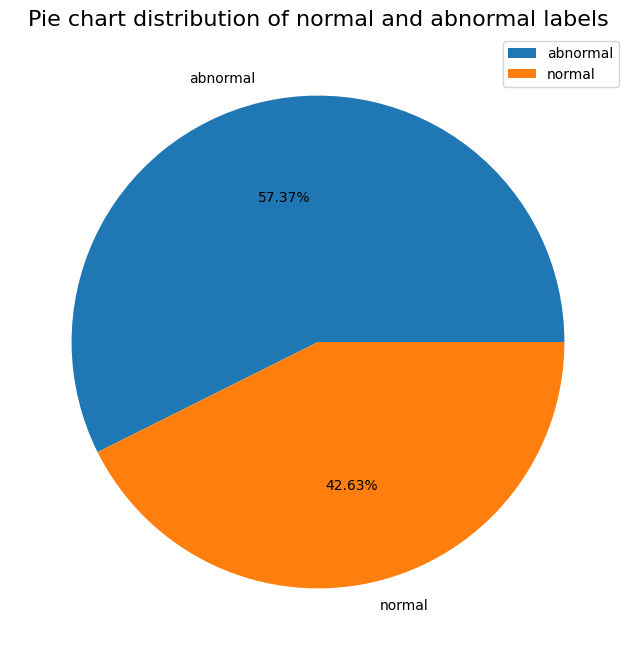

In [51]:
plt.figure(figsize=(8,8))
plt.pie(data.label.value_counts(),labels=['abnormal','normal'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
plt.savefig('plots/Pie_chart_binary.png')
plt.show()

Multi class classification of the dataset

In [52]:
#counts the number of occurrences of each unique value in the column.
data['attack_cat'].value_counts()

,count
attack_cat,
Normal,19394
Exploits,10490
DoS,1135
Fuzzers,1114
Reconnaissance,1103
Analysis,420
Worms,77
Backdoor,70


In [53]:
print(data['attack_cat'].value_counts())

attack_cat
Normal            19394
Exploits          10490
DoS                1135
Fuzzers            1114
Reconnaissance     1103
Analysis            420
Worms                77
Backdoor             70
Name: count, dtype: int64


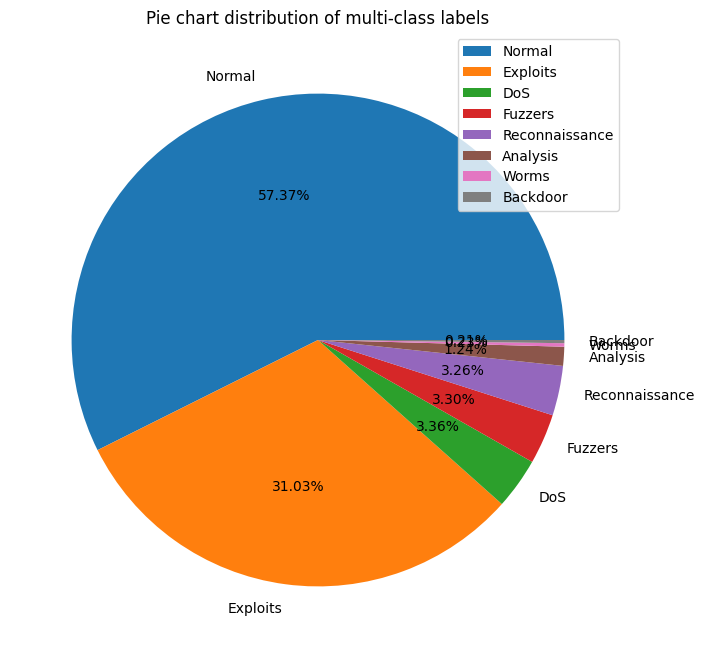

In [54]:
plt.figure(figsize=(8,8))
counts = data['attack_cat'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
#plt.pie(data['attack_cat'].value_counts(),labels=data.attack_cat.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend(loc='best')
plt.savefig('plots/Pie_chart_multi.png')
plt.show()

## One hot encoding is a technique that we use to represent categorical variables as numerical values in a machine learning model

In [55]:
num_col = data.select_dtypes(include='number').columns

# selecting categorical data attributes
cat_col = data.columns.difference(num_col)
cat_col = cat_col[1:]
cat_col

Index(['proto', 'service', 'state'], dtype='object')

In [56]:
# creating a dataframe with only categorical attributes
data_cat = data[cat_col].copy()
data_cat.head()

,proto,service,state
3,tcp,ftp,FIN
11,tcp,smtp,FIN
15,udp,snmp,INT
17,tcp,http,FIN
21,tcp,http,FIN


In [57]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [58]:
print(data_cat.dtypes)

proto_tcp           bool
proto_udp           bool
service_dhcp        bool
service_dns         bool
service_ftp         bool
service_ftp-data    bool
service_http        bool
service_irc         bool
service_pop3        bool
service_radius      bool
service_smtp        bool
service_snmp        bool
service_ssh         bool
service_ssl         bool
state_CON           bool
state_FIN           bool
state_INT           bool
state_REQ           bool
state_RST           bool
dtype: object


In [59]:
data_cat = data_cat.astype(int)

In [60]:
print(data_cat.dtypes)

proto_tcp           int64
proto_udp           int64
service_dhcp        int64
service_dns         int64
service_ftp         int64
service_ftp-data    int64
service_http        int64
service_irc         int64
service_pop3        int64
service_radius      int64
service_smtp        int64
service_snmp        int64
service_ssh         int64
service_ssl         int64
state_CON           int64
state_FIN           int64
state_INT           int64
state_REQ           int64
state_RST           int64
dtype: object


In [61]:
data_cat.head()

,proto_tcp,proto_udp,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
11,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
15,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
17,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
21,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [62]:
data_cat.shape

(33803, 19)

In [63]:
data.shape

(33803, 45)

In [64]:
#The DataFrame data will now include all original columns as well as the new one-hot encoded columns from data_cat.
#The columns from data_cat are appended to data, expanding the DataFrame horizontally.
data = pd.concat([data, data_cat],axis=1)

In [65]:
data.shape

(33803, 64)

In [66]:
#This line removes the original categorical columns from the data DataFrame after they have been replaced by their one-hot encoded versions.
data.drop(columns=cat_col,inplace=True)

In [67]:
data.shape

(33803, 61)

# Data Normalization

In [68]:
# selecting numeric attributes columns from data

#This code creates a list of numeric columns from the data DataFrame, excludes certain columns ('id' and 'label'), and then prints the resulting list of numeric features. The goal is to focus on numeric features that are used for analysis or modeling, excluding columns that are not useful for these purposes.
num_col = list(data.select_dtypes(include='number').columns)
num_col.remove('id')
num_col.remove('label')
print(num_col)

['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'proto_tcp', 'proto_udp', 'service_dhcp', 'service_dns', 'service_ftp', 'service_ftp-data', 'service_http', 'service_irc', 'service_pop3', 'service_radius', 'service_smtp', 'service_snmp', 'service_ssh', 'service_ssl', 'state_CON', 'state_FIN', 'state_INT', 'state_REQ', 'state_RST']


In [69]:
#This function normalization normalizes specified numeric columns in the DataFrame df to a range between 0 and 1 using the MinMaxScaler. It iterates over the specified columns, applies the scaler, and updates the DataFrame in place. The function then returns the modified DataFrame with normalized columns.

# using minmax scaler for normalizing data
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [70]:
# data before normalization
data.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,1.681642,12,12,628,770,13.677108,62.0,252.0,2.740179e+03,...,0,0,0,0,0,0,1,0,0,0
11,12,2.093085,62,28,56329,2212,42.520967,62.0,252.0,2.118251e+05,...,0,1,0,0,0,0,1,0,0,0
15,16,0.000002,2,0,138,0,500000.001300,254.0,0.0,2.760000e+08,...,0,0,1,0,0,0,0,1,0,0
17,18,0.393556,10,8,860,1096,43.195886,62.0,252.0,1.573347e+04,...,0,0,0,0,0,0,1,0,0,0
21,22,0.338017,10,6,998,268,44.376468,254.0,252.0,2.127704e+04,...,0,0,0,0,0,0,1,0,0,0


In [71]:
# calling normalization() function
data = normalization(data.copy(),num_col)

In [72]:
# data after normalization
data.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,2.802780e-02,0.001040,0.001093,0.000041,0.000053,0.000014,0.139013,0.992126,0.000001,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11,12,3.488529e-02,0.006241,0.002551,0.004337,0.000151,0.000042,0.139013,0.992126,0.000092,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15,16,1.666693e-08,0.000000,0.000000,0.000003,0.000000,0.500000,1.000000,0.000000,0.119792,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17,18,6.559354e-03,0.000832,0.000729,0.000058,0.000075,0.000043,0.139013,0.992126,0.000007,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21,22,5.633690e-03,0.000832,0.000547,0.000069,0.000018,0.000044,1.000000,0.992126,0.000009,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Label Encoding

## Binary Labels

In [73]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(data.label.map(lambda x:'normal' if x==0 else 'abnormal'))

In [74]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = data.copy()
bin_data['label'] = bin_label

In [75]:
# label encoding (0,1) binary labels
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['label'] = enc_label

In [76]:
le1.classes_

array(['abnormal', 'normal'], dtype=object)

In [77]:
np.save("le1_classes.npy",le1.classes_,allow_pickle=True)

## Multi-class Labels

In [78]:
#These lines of code create a separate copy of the original DataFrame data named multi_data, and then create a new DataFrame multi_label that contains only the 'attack_cat' column from multi_data. This setup is useful for performing operations on the 'attack_cat' column without affecting the rest of the data or the original DataFrame.

# one-hot-encoding attack label
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.attack_cat)

In [79]:
#This line of code transforms the categorical 'attack_cat' column into several binary columns representing each category, making the data suitable for machine learning algorithms that require numerical input.

multi_data = pd.get_dummies(multi_data,columns=['attack_cat'])

In [80]:
#If the original 'attack_cat' column had categories like ['DoS', 'Probe', 'Normal'], LabelEncoder might map them to [0, 1, 2], respectively. After applying this encoding, the multi_data DataFrame will include a new column 'label' with these numerical values.

# label encoding (0,1,2,3,4,5,6,7,8) multi-class labels
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['label'] = enc_label

In [81]:
multi_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33803 entries, 3 to 106216
Data columns (total 68 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         33803 non-null  int64  
 1   dur                        33803 non-null  float64
 2   spkts                      33803 non-null  float64
 3   dpkts                      33803 non-null  float64
 4   sbytes                     33803 non-null  float64
 5   dbytes                     33803 non-null  float64
 6   rate                       33803 non-null  float64
 7   sttl                       33803 non-null  float64
 8   dttl                       33803 non-null  float64
 9   sload                      33803 non-null  float64
 10  dload                      33803 non-null  float64
 11  sloss                      33803 non-null  float64
 12  dloss                      33803 non-null  float64
 13  sinpkt                     33803 non-null  float64

In [82]:
le2.classes_

array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Normal',
       'Reconnaissance', 'Worms'], dtype=object)

In [83]:
#This line of code saves the unique class labels (le2.classes_) used by the LabelEncoder to a file named "le2_classes.npy". This can be useful for later reference or to reload the class labels if you need to reverse the encoding or use the same label mapping in another environment.

np.save("le2_classes.npy",le2.classes_,allow_pickle=True)

#Correlation between features of dataset

In [84]:
num_col.append('label')

## Correlation Matrix for Binary Labels

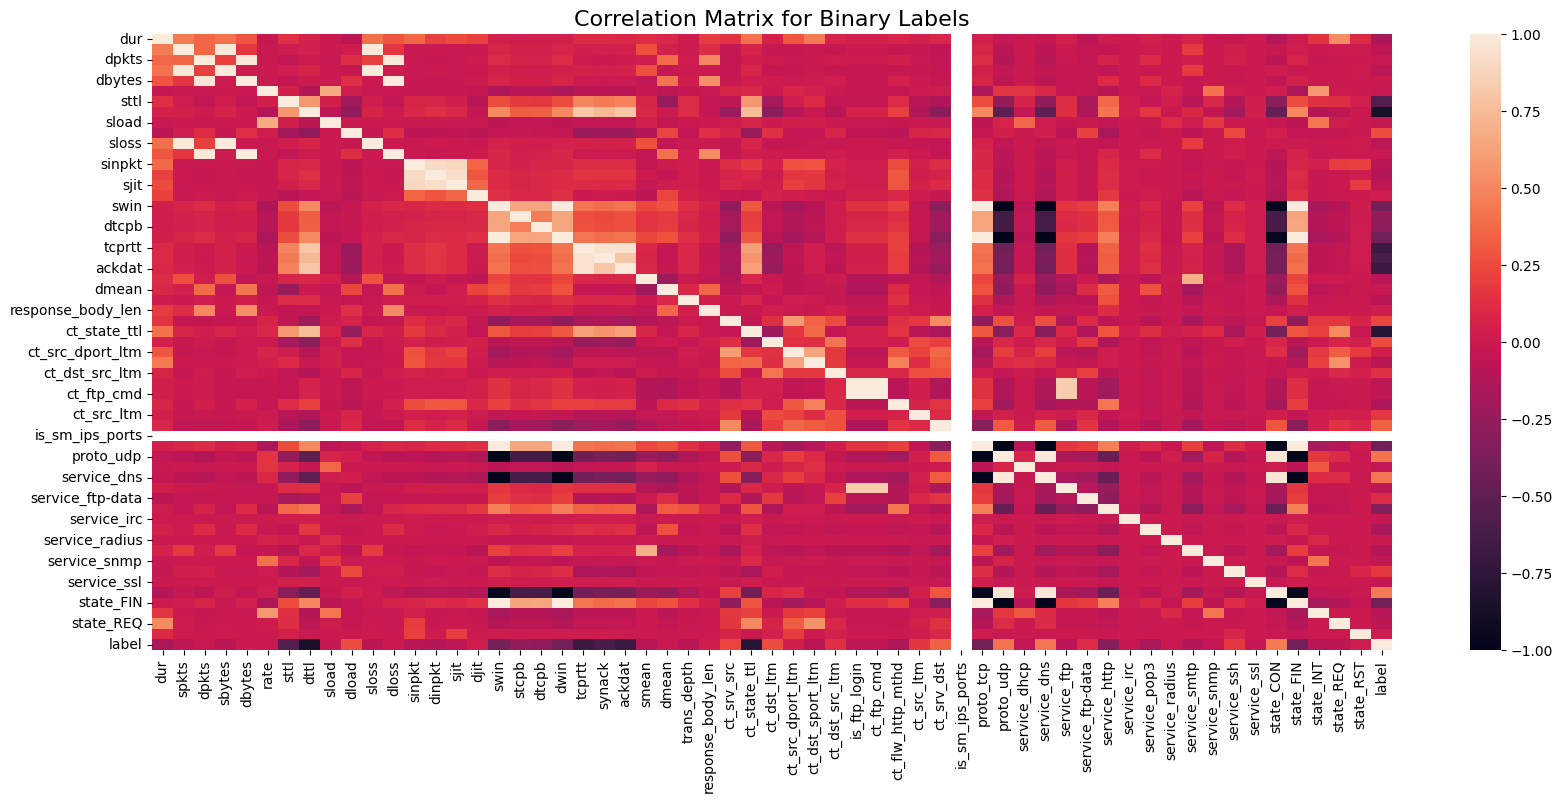

In [85]:
# Correlation Matrix for Binary Labels
plt.figure(figsize=(20,8))
corr_bin = bin_data[num_col].corr()
sns.heatmap(corr_bin,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Binary Labels',fontsize=16)
plt.savefig('plots/correlation_matrix_bin.png')
plt.show()

## Correlation Matrix for Multi-class Labels

In [86]:
num_col = list(multi_data.select_dtypes(include='number').columns)

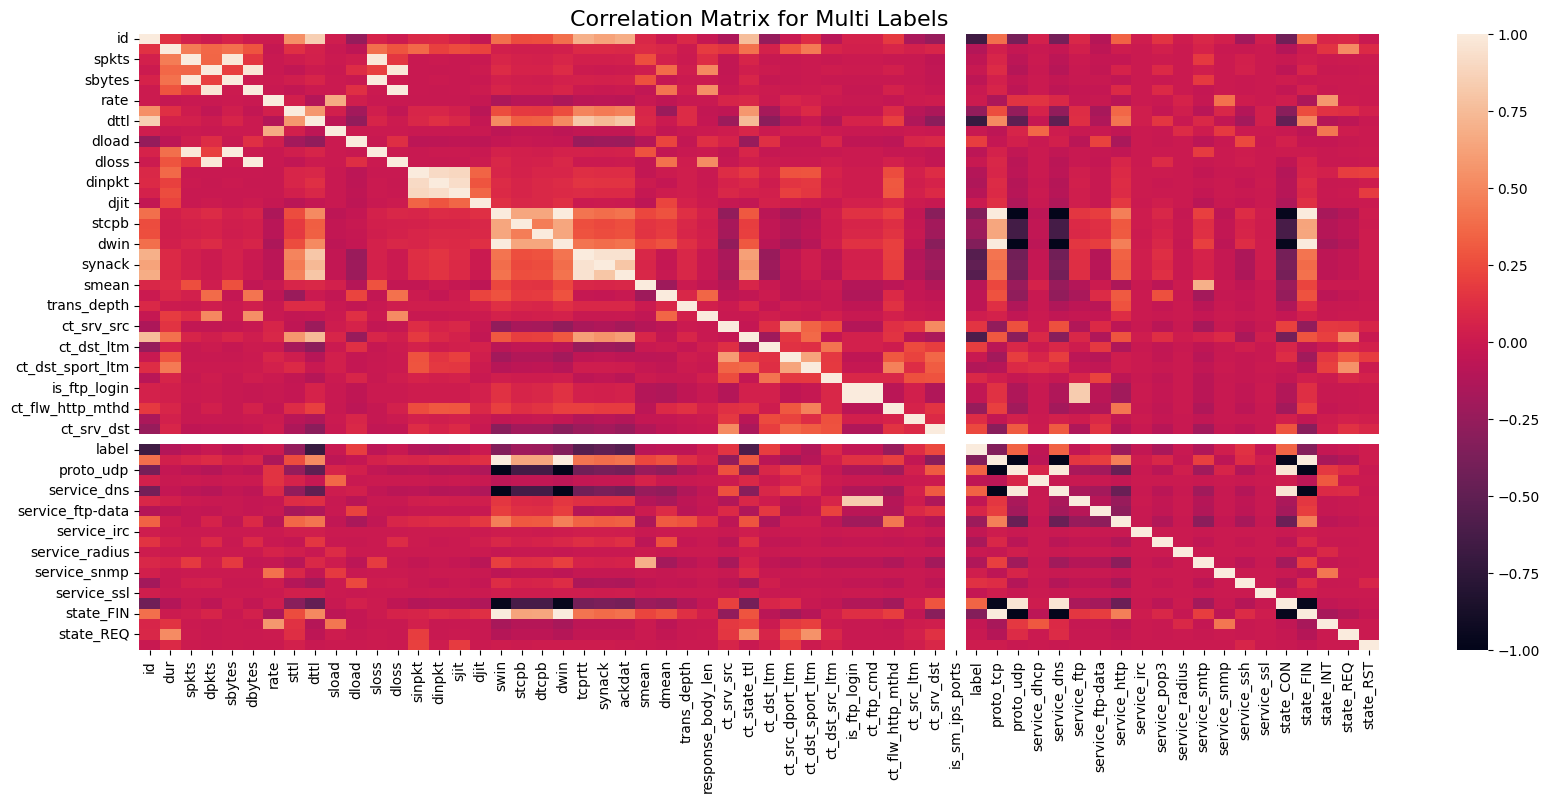

In [87]:
# Correlation Matrix for Multi-class Labels
plt.figure(figsize=(20,8))
corr_multi = multi_data[num_col].corr()
sns.heatmap(corr_multi,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Multi Labels',fontsize=16)
plt.savefig('plots/correlation_matrix_multi.png')
plt.show()

# Feature Selection

## Multi-class Labels

In [88]:
#This code identifies and lists the numeric attributes in the multi_data DataFrame that have a strong correlation (greater than 0.3) with the encoded 'label' attribute. The correlation values are considered in absolute terms, so both positive and negative correlations above the threshold are included. The results are sorted in ascending order to show the attributes with the lowest significant correlations first.

# finding the attributes which have more than 0.3 correlation with encoded attack label attribute
corr_ymulti = abs(corr_multi['label'])
highest_corr_multi = corr_ymulti[corr_ymulti >0.3]
highest_corr_multi.sort_values(ascending=True)


,label
state_FIN,0.331750
proto_udp,0.336773
swin,0.336773
dwin,0.336773
proto_tcp,0.336773
service_dns,0.340591
state_CON,0.346112
synack,0.492736
tcprtt,0.550236
ackdat,0.550986


In [89]:
# selecting attributes found by using pearson correlation coefficient
multi_cols = highest_corr_multi.index
multi_cols

Index(['id', 'dttl', 'swin', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'ct_state_ttl', 'label', 'proto_tcp', 'proto_udp', 'service_dns',
       'state_CON', 'state_FIN'],
      dtype='object')

In [90]:
# Multi-class labelled Dataset
multi_data = multi_data[multi_cols].copy()

In [92]:
multi_data.to_csv('./datasets/multi_data.csv')

# Random Forest Classifier

## Binary Classification

In [93]:
X = bin_data.drop(columns=['label'],axis=1)
Y = bin_data['label']

In [94]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

In [95]:
print(X_train.dtypes)

id                     int64
dur                  float64
spkts                float64
dpkts                float64
sbytes               float64
dbytes               float64
rate                 float64
sttl                 float64
dttl                 float64
sload                float64
dload                float64
sloss                float64
dloss                float64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                 float64
stcpb                float64
dtcpb                float64
dwin                 float64
tcprtt               float64
synack               float64
ackdat               float64
smean                float64
dmean                float64
trans_depth          float64
response_body_len    float64
ct_srv_src           float64
ct_state_ttl         float64
ct_dst_ltm           float64
ct_src_dport_ltm     float64
ct_dst_sport_ltm     float64
ct_dst_src_ltm       float64
is_ftp_login  

In [96]:
# Drop the 'attack_cat' column from X_train
X_train = X_train.drop(columns=['attack_cat'])

# Optionally, do the same for X_test if it contains the same column
X_test = X_test.drop(columns=['attack_cat'])

In [97]:
print(X_train.dtypes)

id                     int64
dur                  float64
spkts                float64
dpkts                float64
sbytes               float64
dbytes               float64
rate                 float64
sttl                 float64
dttl                 float64
sload                float64
dload                float64
sloss                float64
dloss                float64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                 float64
stcpb                float64
dtcpb                float64
dwin                 float64
tcprtt               float64
synack               float64
ackdat               float64
smean                float64
dmean                float64
trans_depth          float64
response_body_len    float64
ct_srv_src           float64
ct_state_ttl         float64
ct_dst_ltm           float64
ct_src_dport_ltm     float64
ct_dst_sport_ltm     float64
ct_dst_src_ltm       float64
is_ftp_login  

In [98]:
rf_bin = RandomForestClassifier(random_state=123)
rf_bin.fit(X_train,y_train)

RandomForestClassifier(random_state=123)

In [99]:
y_pred = rf_bin.predict(X_test)

In [100]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.005768377458955776
Mean Squared Error -  0.005768377458955776
Root Mean Squared Error -  0.07594983514765372
R2 Score -  97.64275102823723
Accuracy -  99.42316225410443


In [101]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.99      1.00      0.99      2870
      normal       1.00      0.99      0.99      3891

    accuracy                           0.99      6761
   macro avg       0.99      0.99      0.99      6761
weighted avg       0.99      0.99      0.99      6761



In [102]:
rf_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_bin_df.to_csv('./predictions/rf_real_pred_bin.csv')
rf_bin_df

,Actual,Predicted
24223,1,1
26869,1,1
59186,0,0
63464,0,0
35909,1,1
...,...,...
102697,0,0
54170,0,0
44946,1,1
68647,0,0


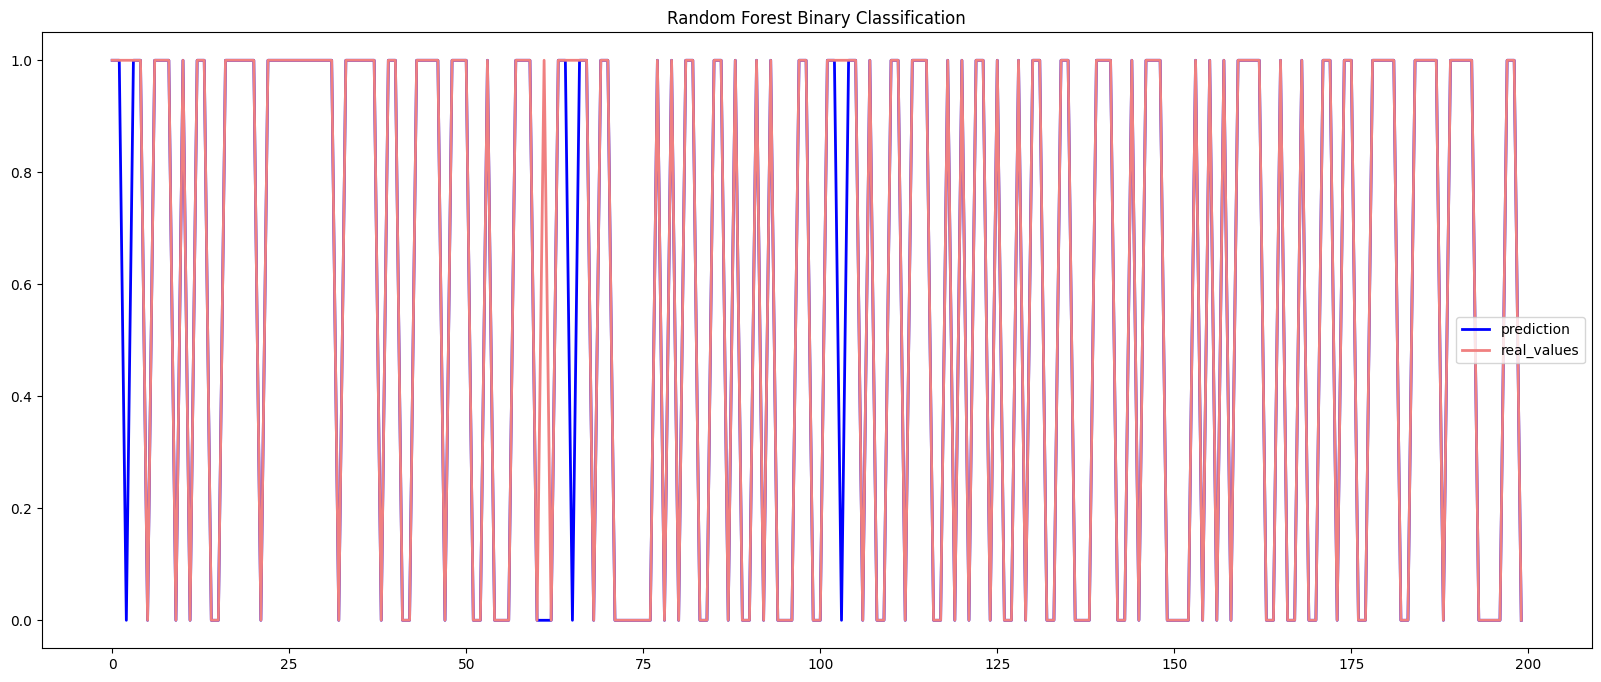

In [103]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[200:400], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[200:400].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Random Forest Binary Classification")
plt.savefig('plots/rf_real_pred_bin.png')
plt.show()

## Multi Class Classification

In [104]:
X = multi_data.drop(columns=['label'],axis=1)
Y = multi_data['label']

In [105]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.30, random_state=100)

In [106]:
rf_multi = RandomForestClassifier(random_state=50)
rf_multi.fit(X_train,y_train)

RandomForestClassifier(random_state=50)

In [107]:
y_pred = rf_multi.predict(X_test)

In [108]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.2466226210432896
Mean Squared Error -  0.5905729218025836
Root Mean Squared Error -  0.7684874246222794
R2 Score -  56.33797263742115
Accuracy -  87.04269795878119


In [109]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

                precision    recall  f1-score   support

      Analysis       0.89      0.33      0.48       119
      Backdoor       0.40      0.08      0.14        24
           DoS       0.30      0.05      0.09       359
      Exploits       0.72      0.97      0.83      3070
       Fuzzers       0.64      0.25      0.36       348
        Normal       0.99      0.97      0.98      5848
Reconnaissance       0.37      0.04      0.08       356
         Worms       0.00      0.00      0.00        17

      accuracy                           0.87     10141
     macro avg       0.54      0.34      0.37     10141
  weighted avg       0.85      0.87      0.84     10141



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [110]:
rf_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_multi_df.to_csv('./predictions/rf_real_pred_multi.csv')
rf_multi_df

,Actual,Predicted
100702,4,4
28489,5,5
6543,5,5
30400,5,5
66799,3,6
...,...,...
78719,3,3
69209,3,3
44662,5,5
4038,5,5


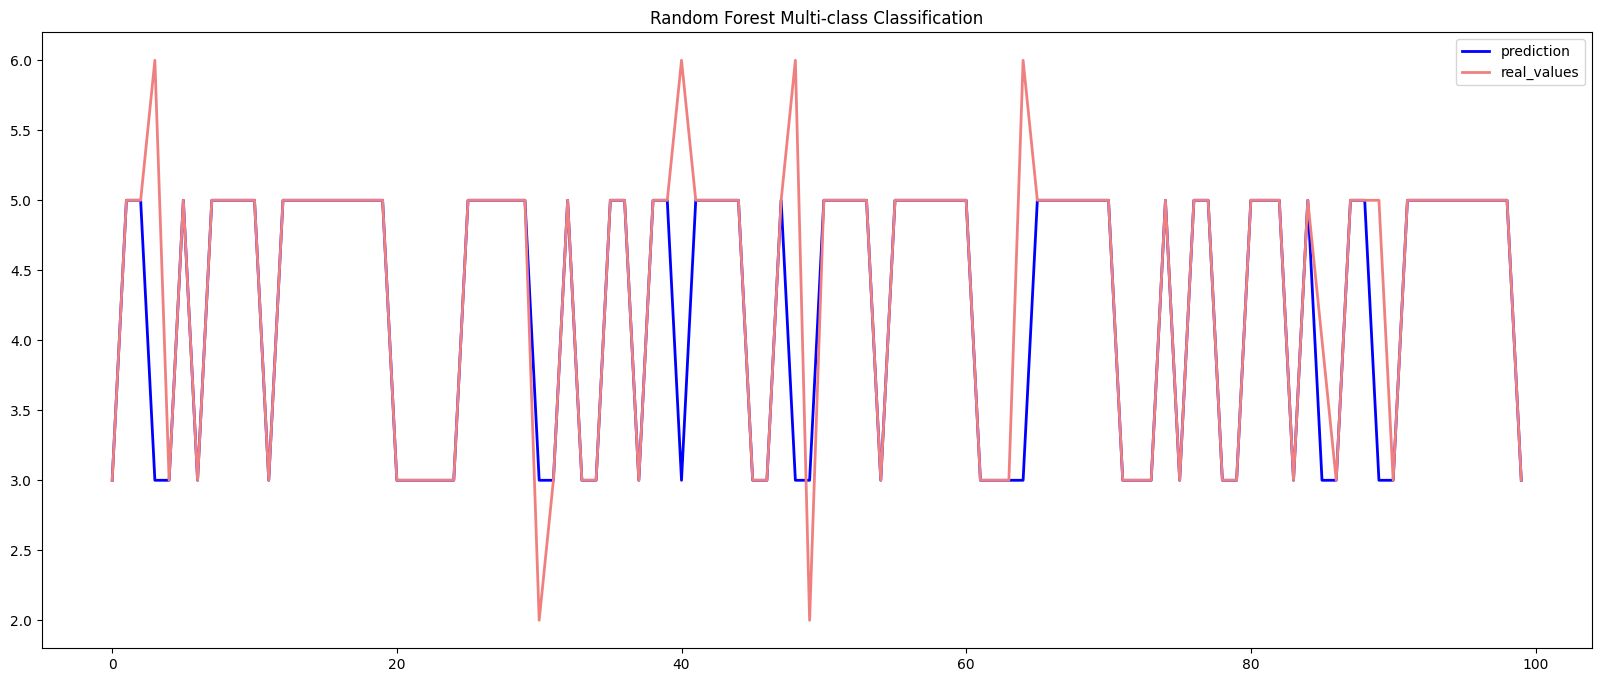

In [111]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[500:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[500:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Random Forest Multi-class Classification")
plt.savefig('plots/rf_real_pred_multi.png')
plt.show()

In [112]:
pkl_filename = "./models/random_forest_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(rf_multi, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


## Naive Bayes Classification & Voting Classifier for ensembling the algorithms

In [113]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [114]:
# Train Naive Bayes classifier
nb_multi = GaussianNB()
nb_multi.fit(X_train, y_train)

# Voting Classifier - combining Random Forest and Naive Bayes
voting_clf = VotingClassifier(
    estimators=[('rf', rf_multi), ('nb', nb_multi)],
    voting='soft'  # 'soft' for averaging probabilities, 'hard' for majority voting
)

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# Predict using the hybrid model
y_pred_voting = voting_clf.predict(X_test)

# Evaluate the hybrid model
print("Accuracy:", accuracy_score(y_test, y_pred_voting))
print("Classification Report:\n", classification_report(y_test, y_pred_voting))

Accuracy: 0.8670742530322454
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.04      0.08       119
           1       0.00      0.00      0.00        24
           2       0.37      0.02      0.04       359
           3       0.70      1.00      0.82      3070
           4       0.86      0.20      0.32       348
           5       1.00      0.97      0.98      5848
           6       0.38      0.01      0.02       356
           7       0.00      0.00      0.00        17

    accuracy                           0.87     10141
   macro avg       0.54      0.28      0.28     10141
weighted avg       0.86      0.87      0.83     10141



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Interpretation of Classification Report

**Accuracy** is the percentage of correct predictions out of the total predictions.
In your case, the model's accuracy is approximately 79.7%, meaning 79.7% of the predictions were correct.

**Precision** (0.04): Out of all the instances the model predicted as class 0, only 4% were actually class 0. A low precision means a high number of false positives.

**Recall** (0.86): Out of all the actual class 0 instances, the model correctly predicted 86% of them as class 0. High recall means the model caught most of the true positives.

**F1-score** (0.07): This is the harmonic mean of precision and recall. Since precision is quite low (0.04), the F1-score is also very low at 0.07.

**Support** (166): The number of actual instances of class 0 in the test set, which is 166 in this case.


## Dispaly confusion matrix
To display a confusion matrix that shows the True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN), you can use the confusion_matrix function from sklearn.metrics. A confusion matrix provides a more detailed breakdown of how well your model is performing in terms of classification.

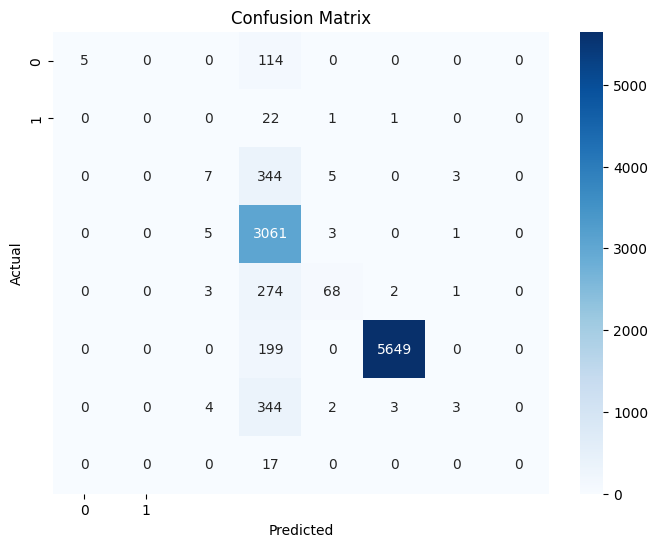

In [115]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions from your model
y_pred_voting = voting_clf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_voting)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()